In [1]:
! sudo pip install -U bltk
! pip install -U bnlp_toolkit
! pip install inltk
! pip install banglanltk

     |████████████████████████████████| 17.4 MB 6.6 MB/s eta 0:00:01
     |████████████████████████████████| 301 kB 42.0 MB/s eta 0:00:01
     |████████████████████████████████| 1.5 MB 37.6 MB/s eta 0:00:01
     |████████████████████████████████| 17.3 MB 43.7 MB/s eta 0:00:01
     |████████████████████████████████| 11.1 MB 49.2 MB/s eta 0:00:01
     |████████████████████████████████| 34.5 MB 37.4 MB/s eta 0:00:01
    ERROR: Command errored out with exit status 1:
     command: /usr/bin/python3 -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'/tmp/pip-install-gprnq1ev/sklearn/setup.py'"'"'; __file__='"'"'/tmp/pip-install-gprnq1ev/sklearn/setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' egg_info --egg-base /tmp/pip-install-gprnq1ev/sklearn/pip-egg-info
         cwd: /tmp/pip-install-gprnq1ev/sklearn/
    Complete output (15 lines):
    The 'sklearn' PyPI p

1. **`! sudo pip install -U bltk`**:
   - **`sudo`**: This command runs the installation with superuser (administrator) privileges, which is often required for installing packages globally on the system.
   - **`pip install`**: This command is used to install Python packages.
   - **`-U`**: This flag stands for "upgrade." It means that if the package is already installed, it will be upgraded to the latest version available.
   - **`bltk`**: This is the name of the package being installed. BLTK (Bengali Language Toolkit) provides tools for working with Bengali text, including tokenization, stemming, and more.

2. **`! pip install -U bnlp_toolkit`**:
   - This command installs or upgrades the **`bnlp_toolkit`**, which is another NLP library designed specifically for processing Bengali text. It offers functionalities like tokenization, parts of speech tagging, and sentiment analysis.

3. **`! pip install inltk`**:
   - The **`inltk`** package (Indian Natural Language Toolkit) provides NLP tools for multiple Indian languages, including Bengali. It includes functionalities such as translation, text classification, and more. This command installs or upgrades the package.

4. **`! pip install banglanltk`**:
   - **`banglanltk`** is another library focused on Bengali NLP, providing various utilities for processing Bengali text. This command installs or upgrades this package.


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
import re 
from wordcloud import WordCloud
import string

from wordcloud import WordCloud
import matplotlib.pylab as plt
from PIL import Image, ImageTk
from wordcloud.wordcloud import STOPWORDS
stopwords=set(STOPWORDS)
from collections import Counter
from PIL import Image, ImageDraw, ImageFont

from nltk.tokenize import word_tokenize
from wordcloud import STOPWORDS
import nltk
import string
import seaborn as sns
from tensorflow.python.keras.layers.pooling import MaxPool1D
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import  Dense,Embedding,LSTM,Conv1D,MaxPool1D 
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score
from nltk.probability import FreqDist

from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')

2024-10-15 15:05:53.520177: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-15 15:05:53.520336: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-15 15:05:53.681172: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# read data

In [3]:
df2=pd.read_csv("/kaggle/input/bengali-and-english-news-dataset-for-analysis/final_bn_data.csv")

In [4]:
df2.head()

,category,headline,content,label
0,National,৮ দিনে ১৮ বিল পাস!,দশম জাতীয় সংসদের মেয়াদ শেষ হয়ে যাচ্ছে। কার্যত ...,0.0
1,Sports,আ’লীগের জনসভায় লোকে লোকারণ্য ফেনী ট্রাংক রোড,একাদশ জাতীয় সংসদ নির্বাচনকে সামনে রেখে সাংগঠনি...,0.0
2,National,মাদ্রাসায় জোড়া খুন: পরিচালক তিন দিনের রিমান্ডে,গাজীপুরে জোড়া খুন মামলার প্রধান আসামি মাদ্রাসা...,0.0
3,Sports,নেপালকে হারিয়ে গ্রুপ চ্যাম্পিয়ন বাংলাদেশ,সাফ অনূর্ধ্ব-১৮ নারী ফুটবল চ্যাম্পিয়নশিপে নেপা...,1.0
4,National,কুড়িগ্রামে ২ শিক্ষার্থীর লাশ উদ্ধার,কুড়িগ্রাম প্রতিনিধি : কুড়িগ্রাম সদর উপজেলার বে...,1.0


In [5]:
df2.tail()

,category,headline,content,label
14532,National,নাইক্ষ্যংছ‌ড়ি‌তে পু‌লি‌শ-ডাকাত বন্দুকযু‌দ্ধে ন...,বান্দরবা‌নের নাইক্ষ্যংছ‌ড়ি উপজেলায় পু‌লি‌শের স...,0.0
14533,Crime,এবি ব্যাংকের প্রাক্তন চেয়ারম্যানসহ ৪ জনকে জিজ্...,নিজস্ব প্রতিবেদক : সিটিসেলের নামে ৩৮৩ কোটি টাক...,1.0
14534,Education,পরীক্ষা বাতিল হওয়ায় ১ম -৩য় শ্রেণীতে ভর্তি হতে ...,১-৩ শ্রেনী পর্যন্ত পরীক্ষা বাতিলের কথা শুনে দে...,0.0
14535,Sports,এশিয়া কাপে আজ ভারত-পাকিস্তানের মহারণ,আজ এশিয়া কাপের সবচেয়ে আকর্ষণীয় ম্যাচে ভারতের ম...,0.0
14536,Lifestyle,অনলাইনে পোশাক কিনলেই ছাড়,সমসাময়িক ট্রেন্ড এবং তারুণ্য নির্ভর ফ্যাশনে ক্...,1.0


In [6]:
df2.shape

(14537, 4)

In [7]:
df2.columns

Index(['category', 'headline', 'content', 'label'], dtype='object')

In [8]:
df2.duplicated().sum()

0

In [9]:
df2.isnull().sum()

category    0
headline    0
content     0
label       0
dtype: int64

In [10]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14537 entries, 0 to 14536
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   category  14537 non-null  object 
 1   headline  14537 non-null  object 
 2   content   14537 non-null  object 
 3   label     14537 non-null  float64
dtypes: float64(1), object(3)
memory usage: 454.4+ KB


In [11]:
df2.describe()

,label
count,14537.000000
mean,0.687900
std,0.463366
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


In [12]:
df2['category'].unique()

array(['National', 'Sports', 'Finance', 'Entertainment', 'Editorial',
       'Lifestyle', 'International', 'Technology', 'Politics',
       'Miscellaneous', 'Crime', 'Education'], dtype=object)

In [13]:
df2['category'].value_counts()

category
National         5321
International    1898
Sports           1858
Miscellaneous    1236
Editorial        1021
Politics          879
Entertainment     788
Lifestyle         342
Crime             335
Education         308
Finance           300
Technology        251
Name: count, dtype: int64

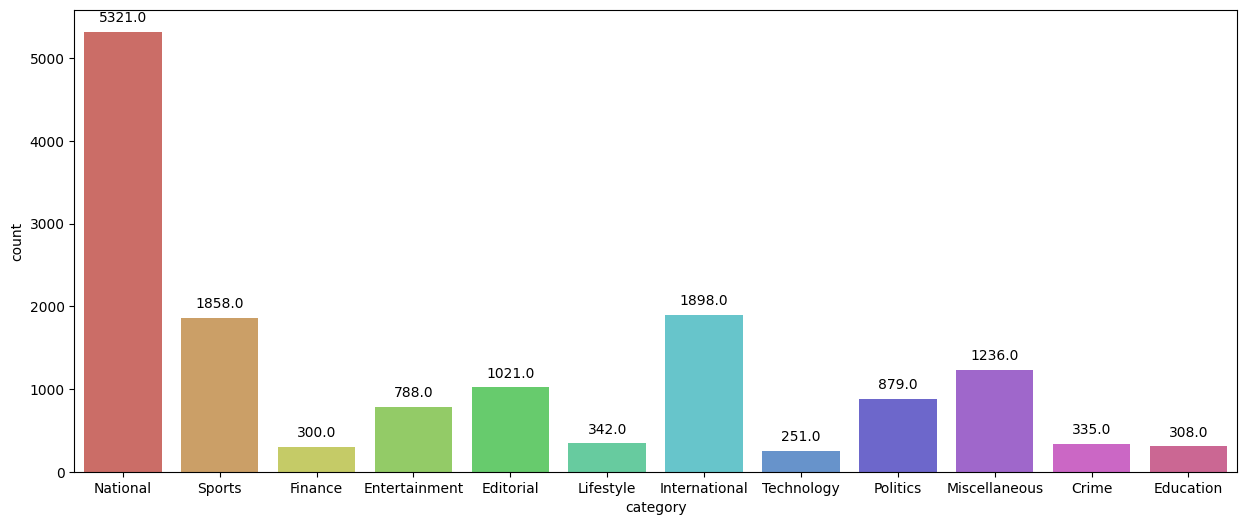

In [14]:
plt.figure(figsize=(15, 6))
ax = sns.countplot(x='category', data=df2, palette='hls')
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.show()

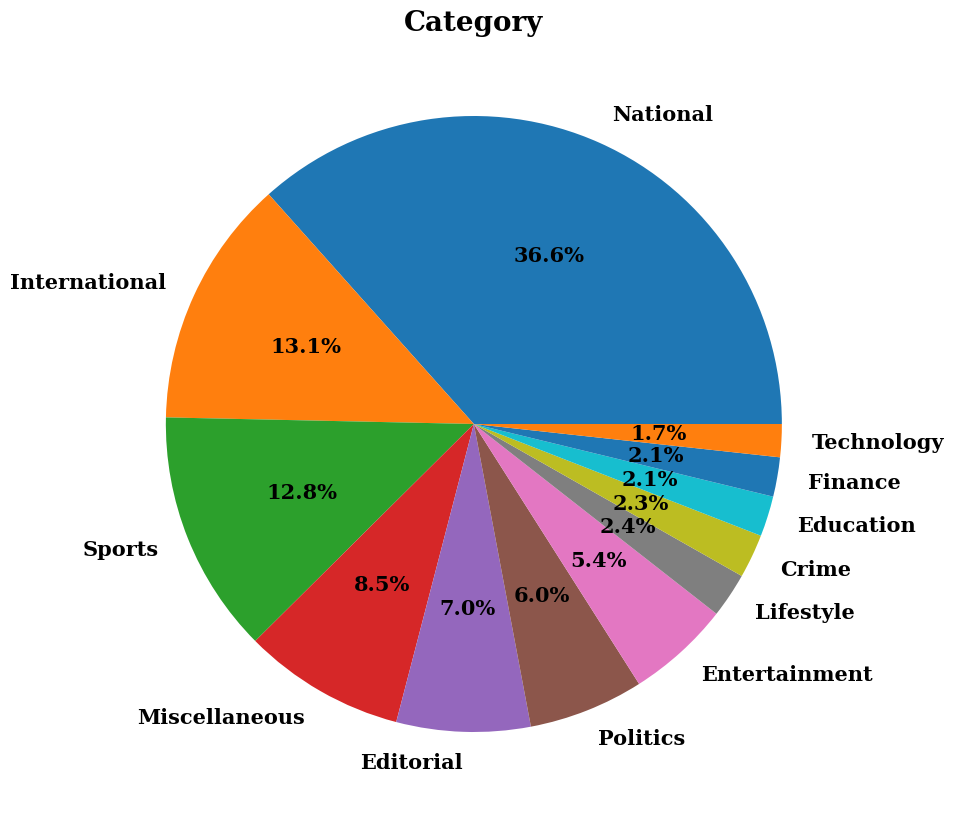

In [15]:
plt.figure(figsize=(20,10)) 
plt.pie(df2['category'].value_counts(), labels=df2['category'].value_counts().index, autopct='%1.1f%%', textprops={'fontsize': 15,
                                           'color': 'black',
                                           'weight': 'bold',
                                           'family': 'serif' }) 
hfont = {'fontname':'serif', 'weight': 'bold'}
plt.title('Category', size=20, **hfont) 
plt.show()

In [16]:
df2['label'].unique()

array([0., 1.])

In [17]:
df2['label'].value_counts()

label
1.0    10000
0.0     4537
Name: count, dtype: int64

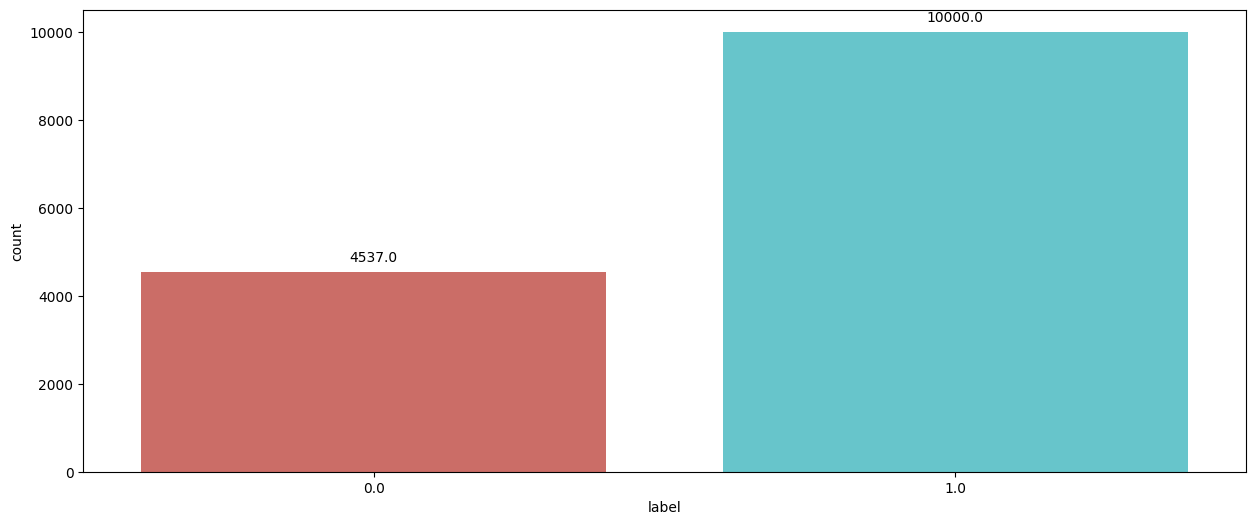

In [18]:
plt.figure(figsize=(15, 6))
ax = sns.countplot(x='label', data=df2, palette='hls')
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.show()

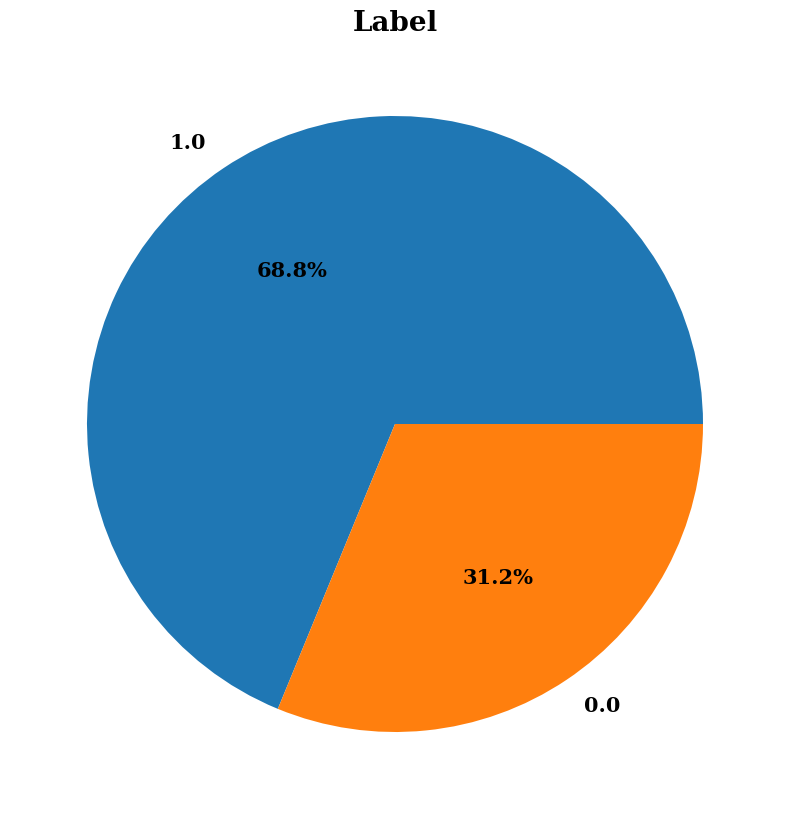

In [19]:
plt.figure(figsize=(20,10)) 
plt.pie(df2['label'].value_counts(), labels=df2['label'].value_counts().index, autopct='%1.1f%%', textprops={'fontsize': 15,
                                           'color': 'black',
                                           'weight': 'bold',
                                           'family': 'serif' }) 
hfont = {'fontname':'serif', 'weight': 'bold'}
plt.title('Label', size=20, **hfont) 
plt.show()

In [20]:
df2["label"]=df2["label"].astype(int)

In [21]:
df2["text"]=df2["headline"]+ " " + df2["content"]

In [22]:
df2=df2[["text","label"]]

In [23]:
df2

,text,label
0,৮ দিনে ১৮ বিল পাস! দশম জাতীয় সংসদের মেয়াদ শেষ ...,0
1,আ’লীগের জনসভায় লোকে লোকারণ্য ফেনী ট্রাংক রোড এ...,0
2,মাদ্রাসায় জোড়া খুন: পরিচালক তিন দিনের রিমান্ডে...,0
3,নেপালকে হারিয়ে গ্রুপ চ্যাম্পিয়ন বাংলাদেশ সাফ অ...,1
4,কুড়িগ্রামে ২ শিক্ষার্থীর লাশ উদ্ধার কুড়িগ্রাম ...,1
...,...,...
14532,নাইক্ষ্যংছ‌ড়ি‌তে পু‌লি‌শ-ডাকাত বন্দুকযু‌দ্ধে ন...,0
14533,এবি ব্যাংকের প্রাক্তন চেয়ারম্যানসহ ৪ জনকে জিজ্...,1
14534,পরীক্ষা বাতিল হওয়ায় ১ম -৩য় শ্রেণীতে ভর্তি হতে ...,0
14535,এশিয়া কাপে আজ ভারত-পাকিস্তানের মহারণ আজ এশিয়া ...,0


In [24]:
df2["character_count"]=df2["text"].str.len()
df2['word_count'] = df2['text'].str.split().str.len()
df2['sentence_count'] = df2['text'].apply(lambda x: len(nltk.sent_tokenize(x)))

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


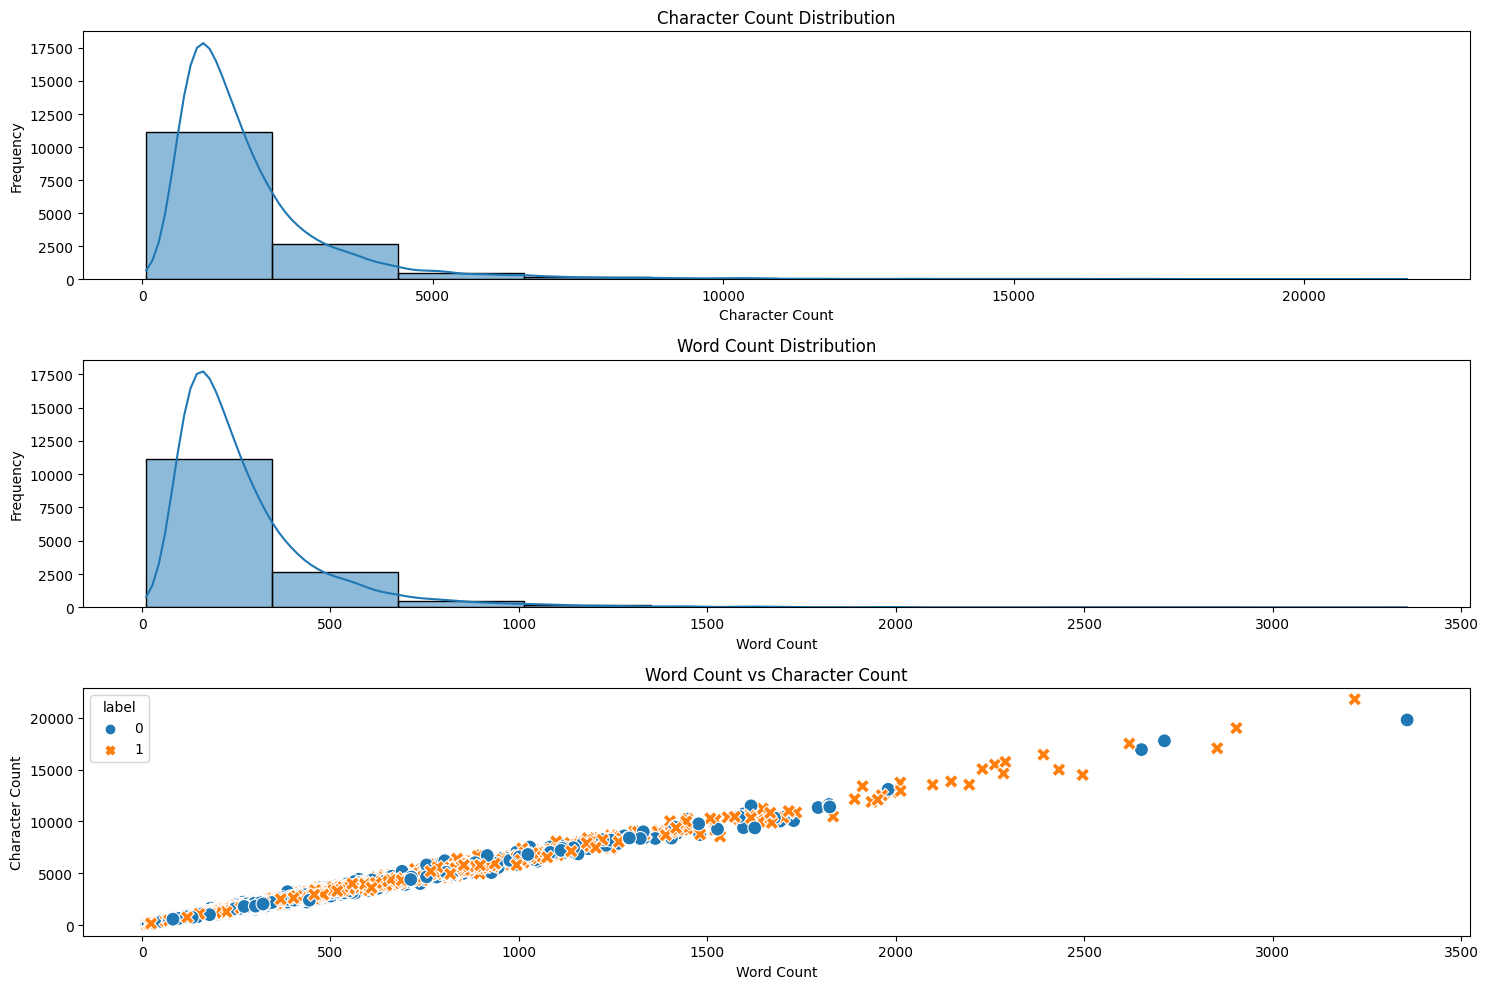

In [25]:
plt.figure(figsize=(15, 10))

plt.subplot(3, 1, 1)
sns.histplot(df2['character_count'], bins=10, kde=True)
plt.title('Character Count Distribution')
plt.xlabel('Character Count')
plt.ylabel('Frequency')

plt.subplot(3, 1, 2)
sns.histplot(df2['word_count'], bins=10, kde=True)
plt.title('Word Count Distribution')
plt.xlabel('Word Count')
plt.ylabel('Frequency')

plt.subplot(3, 1, 3)
sns.scatterplot(data=df2, x='word_count', y='character_count', hue='label', style='label', s=100)
plt.title('Word Count vs Character Count')
plt.xlabel('Word Count')
plt.ylabel('Character Count')

plt.tight_layout()
plt.show()


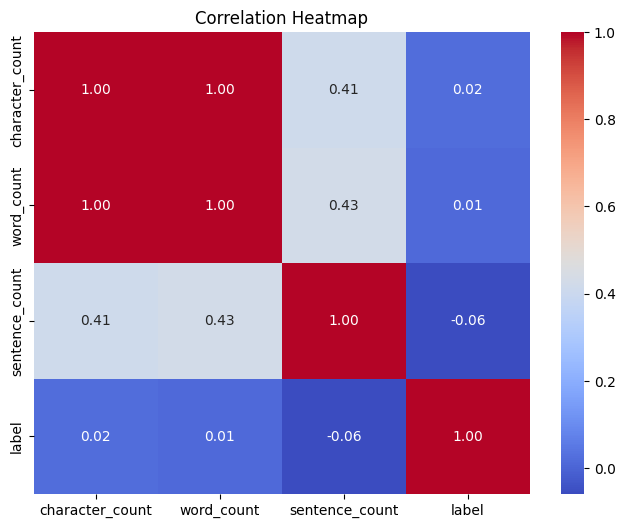

In [26]:
plt.figure(figsize=(8, 6))
correlation_matrix = df2[['character_count', 'word_count', 'sentence_count', 'label']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

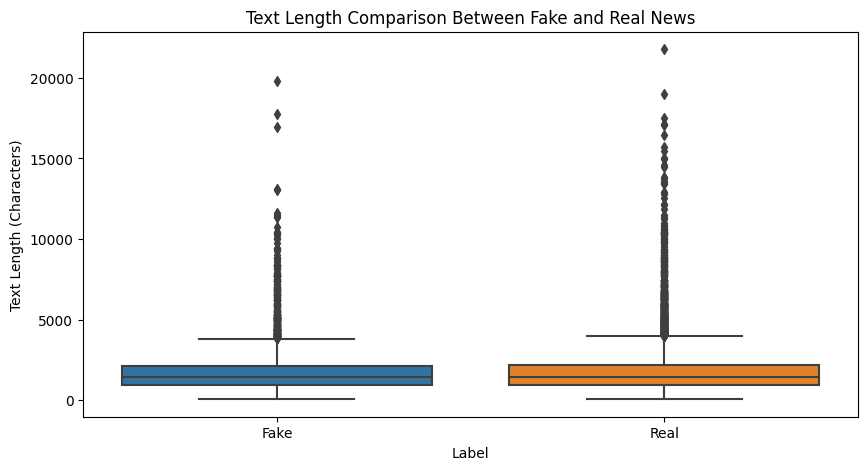

In [27]:
fake_len = df2[df2["label"] == 0]["text"].str.len()
real_len = df2[df2["label"] == 1]["text"].str.len()

lengths_df = pd.DataFrame({
    'length': pd.concat([fake_len, real_len]),
    'label': ['Fake'] * len(fake_len) + ['Real'] * len(real_len)
})

plt.figure(figsize=(10, 5))
sns.boxplot(x='label', y='length', data=lengths_df)
plt.title('Text Length Comparison Between Fake and Real News')
plt.xlabel('Label')
plt.ylabel('Text Length (Characters)')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


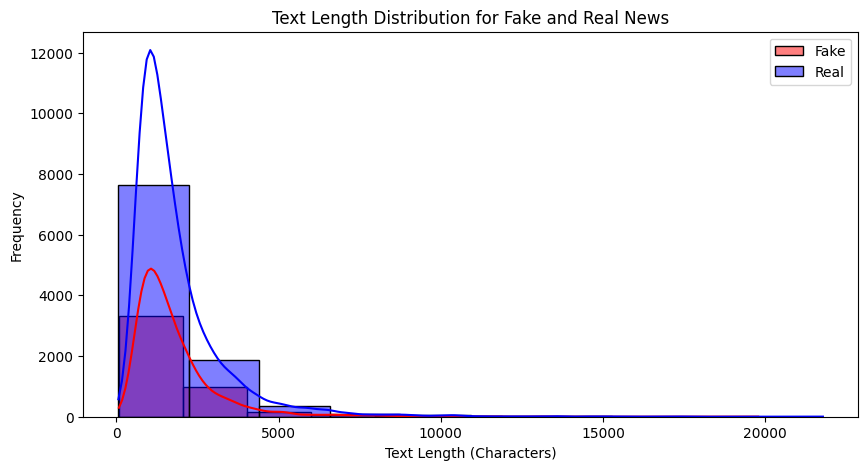

In [28]:
plt.figure(figsize=(10, 5))
sns.histplot(fake_len, bins=10, color='red', label='Fake', kde=True)
sns.histplot(real_len, bins=10, color='blue', label='Real', kde=True)
plt.title('Text Length Distribution for Fake and Real News')
plt.xlabel('Text Length (Characters)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [29]:
fake_stats = {
    'mean': fake_len.mean(),
    'median': fake_len.median(),
    'std_dev': fake_len.std(),
}

real_stats = {
    'mean': real_len.mean(),
    'median': real_len.median(),
    'std_dev': real_len.std(),
}

print("Fake News Text Length Statistics:")
print(fake_stats)

print("\nReal News Text Length Statistics:")
print(real_stats)

Fake News Text Length Statistics:
{'mean': 1787.180736169275, 'median': 1423.0, 'std_dev': 1385.0685992565361}

Real News Text Length Statistics:
{'mean': 1848.3271, 'median': 1418.0, 'std_dev': 1495.053675643417}


In [30]:
df2 = df2[['text', 'label']]

In [31]:
df2

,text,label
0,৮ দিনে ১৮ বিল পাস! দশম জাতীয় সংসদের মেয়াদ শেষ ...,0
1,আ’লীগের জনসভায় লোকে লোকারণ্য ফেনী ট্রাংক রোড এ...,0
2,মাদ্রাসায় জোড়া খুন: পরিচালক তিন দিনের রিমান্ডে...,0
3,নেপালকে হারিয়ে গ্রুপ চ্যাম্পিয়ন বাংলাদেশ সাফ অ...,1
4,কুড়িগ্রামে ২ শিক্ষার্থীর লাশ উদ্ধার কুড়িগ্রাম ...,1
...,...,...
14532,নাইক্ষ্যংছ‌ড়ি‌তে পু‌লি‌শ-ডাকাত বন্দুকযু‌দ্ধে ন...,0
14533,এবি ব্যাংকের প্রাক্তন চেয়ারম্যানসহ ৪ জনকে জিজ্...,1
14534,পরীক্ষা বাতিল হওয়ায় ১ম -৩য় শ্রেণীতে ভর্তি হতে ...,0
14535,এশিয়া কাপে আজ ভারত-পাকিস্তানের মহারণ আজ এশিয়া ...,0


In [32]:
import re
from bnlp import BengaliCorpus as corpus


from collections import Counter
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from wordcloud import WordCloud
from bs4 import BeautifulSoup
import banglanltk as bn
import string

In [33]:
print(corpus.stopwords)
print("=========================================================================================")
print(corpus.punctuations)
print("=========================================================================================")
print(corpus.letters)
print("=========================================================================================")
print(corpus.digits)
print("=========================================================================================")
print(corpus.vowels)
print("=========================================================================================")

['অতএব', 'অথচ', 'অথবা', 'অনুযায়ী', 'অনেক', 'অনেকে', 'অনেকেই', 'অন্তত', 'অন্য', 'অবধি', 'অবশ্য', 'অর্থাত', 'আই', 'আগামী', 'আগে', 'আগেই', 'আছে', 'আজ', 'আদ্যভাগে', 'আপনার', 'আপনি', 'আবার', 'আমরা', 'আমাকে', 'আমাদের', 'আমার', 'আমি', 'আর', 'আরও', 'ই', 'ইত্যাদি', 'ইহা', 'উচিত', 'উত্তর', 'উনি', 'উপর', 'উপরে', 'এ', 'এঁদের', 'এঁরা', 'এই', 'একই', 'একটি', 'একবার', 'একে', 'এক্', 'এখন', 'এখনও', 'এখানে', 'এখানেই', 'এটা', 'এটাই', 'এটি', 'এত', 'এতটাই', 'এতে', 'এদের', 'এব', 'এবং', 'এবার', 'এমন', 'এমনকী', 'এমনি', 'এর', 'এরা', 'এল', 'এস', 'এসে', 'ঐ', 'ও', 'ওঁদের', 'ওঁর', 'ওঁরা', 'ওই', 'ওকে', 'ওখানে', 'ওদের', 'ওর', 'ওরা', 'কখনও', 'কত', 'কবে', 'কমনে', 'কয়েক', 'কয়েকটি', 'করছে', 'করছেন', 'করতে', 'করবে', 'করবেন', 'করলে', 'করলেন', 'করা', 'করাই', 'করায়', 'করার', 'করি', 'করিতে', 'করিয়া', 'করিয়ে', 'করে', 'করেই', 'করেছিলেন', 'করেছে', 'করেছেন', 'করেন', 'কাউকে', 'কাছ', 'কাছে', 'কাজ', 'কাজে', 'কারও', 'কারণ', 'কি', 'কিংবা', 'কিছু', 'কিছুই', 'কিন্তু', 'কী', 'কে', 'কেউ', 'কেউই', 'কেখা', 'কেন', 'কোটি', 'কোন', 'কোনও'

# All data wordcloud

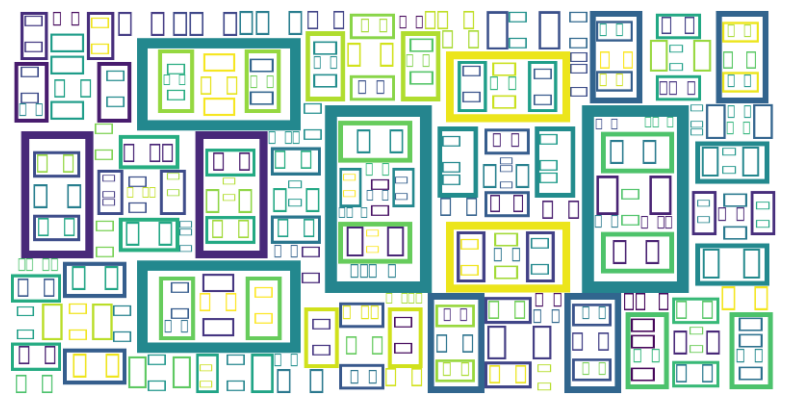

In [34]:
text_combined = ' '.join(df2['text'])

wordcloud = WordCloud(font_path='/kaggle/input/elegant-and-functional-fonts/Hack-Regular.ttf',  
                      width=800,
                      height=400,
                      background_color='white').generate(text_combined)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  
plt.show()

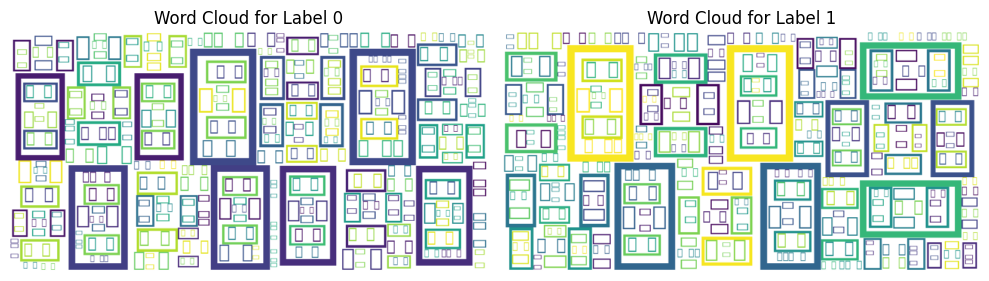

In [35]:
text_label_0 = ' '.join(df2[df2['label'] == 0]['text'])
wordcloud_0 = WordCloud(font_path='/kaggle/input/elegant-and-functional-fonts/Hack-Regular.ttf', 
                        width=800,
                        height=400,
                        background_color='white').generate(text_label_0)

text_label_1 = ' '.join(df2[df2['label'] == 1]['text'])
wordcloud_1 = WordCloud(font_path='/kaggle/input/elegant-and-functional-fonts/Hack-Regular.ttf',  
                        width=800,
                        height=400,
                        background_color='white').generate(text_label_1)


plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1) 
plt.imshow(wordcloud_0, interpolation='bilinear')
plt.axis('off')  
plt.title("Word Cloud for Label 0")  

plt.subplot(1, 2, 2) 
plt.imshow(wordcloud_1, interpolation='bilinear')
plt.axis('off')  
plt.title("Word Cloud for Label 1") 

plt.tight_layout()
plt.show()

# 30 Most common Words From All Text

In [36]:
all_text = ' '.join(df2['text'])

all_text = re.sub(r'[^\w\s]', ' ', all_text) 
all_text = all_text.lower()  

words = all_text.split()

word_counts = Counter(words)

most_common_words = word_counts.most_common(30)

print("30 Most Common Words:")
for word, count in most_common_words:
    print(f"{word}: {count}")

30 Most Common Words:
র: 1113229
ন: 720515
ত: 463564
ক: 455263
ব: 439542
স: 346036
ল: 344108
ম: 323426
দ: 322644
প: 294876
য: 286304
য়: 255972
শ: 203836
ট: 193171
জ: 183983
ছ: 164697
গ: 146522
কর: 121625
হ: 118328
চ: 117764
থ: 102250
ষ: 100928
খ: 90159
ধ: 84863
ভ: 80707
ও: 70288
ড: 67485
ই: 66034
পর: 58392
হয়: 51298


In [37]:
def most_common_words(text_data, num_words=30):
    """Returns the most common words from the provided text data."""
    all_text = ' '.join(text_data)

    all_text = re.sub(r'[^\w\s]', ' ', all_text)  
    all_text = all_text.lower()

    words = all_text.split()

    word_counts = Counter(words)

    return word_counts.most_common(num_words)

fake_texts = df2[df2['label'] == 0]['text']
common_fake_words = most_common_words(fake_texts)

real_texts = df2[df2['label'] == 1]['text']
common_real_words = most_common_words(real_texts)

print("Most Common Words from Fake Text:")
for word, count in common_fake_words:
    print(f"{word}: {count}")

print("\nMost Common Words from Real Text:")
for word, count in common_real_words:
    print(f"{word}: {count}")

Most Common Words from Fake Text:
র: 335015
ন: 224110
ক: 143735
ত: 141168
ব: 133541
স: 105224
ল: 103421
ম: 98542
দ: 98435
য: 90455
প: 90362
য়: 76124
শ: 60653
ট: 58566
জ: 55935
ছ: 51610
গ: 44728
কর: 36465
হ: 35898
চ: 35423
থ: 31646
খ: 29633
ষ: 29131
ভ: 25850
ধ: 24967
ই: 23836
ড: 21011
ও: 20789
পর: 17294
ফ: 16529

Most Common Words from Real Text:
র: 778214
ন: 496405
ত: 322396
ক: 311528
ব: 306001
স: 240812
ল: 240687
ম: 224884
দ: 224209
প: 204514
য: 195849
য়: 179848
শ: 143183
ট: 134605
জ: 128048
ছ: 113087
গ: 101794
কর: 85160
হ: 82430
চ: 82341
ষ: 71797
থ: 70604
খ: 60526
ধ: 59896
ভ: 54857
ও: 49499
ড: 46474
ই: 42198
পর: 41098
হয়: 36382


# Character Count

In [38]:
def character_count_by_label(df, label):
    """Returns the total and average character count for a specific label."""
    filtered_texts = df2[df2['label'] == label]['text']
    total_characters = sum(filtered_texts.str.len())
    average_characters = total_characters / len(filtered_texts) if len(filtered_texts) > 0 else 0
    return total_characters, average_characters


fake_characters, fake_avg = character_count_by_label(df2, 0)


real_characters, real_avg = character_count_by_label(df2, 1)


print(f"Total Characters in Fake Text: {fake_characters}")
print(f"Average Characters in Fake Text: {fake_avg:.2f}")

print(f"\nTotal Characters in Real Text: {real_characters}")
print(f"Average Characters in Real Text: {real_avg:.2f}")

Total Characters in Fake Text: 8108439
Average Characters in Fake Text: 1787.18

Total Characters in Real Text: 18483271
Average Characters in Real Text: 1848.33


# Word Count

In [39]:
def word_count_by_label(df, label):
    """Returns the total and average word count for a specific label."""
    filtered_texts = df2[df2['label'] == label]['text']
    total_words = sum(filtered_texts.str.split().str.len())
    average_words = total_words / len(filtered_texts) if len(filtered_texts) > 0 else 0
    return total_words, average_words

fake_words, fake_avg = word_count_by_label(df2, 0)


real_words, real_avg = word_count_by_label(df2, 1)


print(f"Total Words in Fake Text: {fake_words}")
print(f"Average Words in Fake Text: {fake_avg:.2f}")

print(f"\nTotal Words in Real Text: {real_words}")
print(f"Average Words in Real Text: {real_avg:.2f}")

Total Words in Fake Text: 1256159
Average Words in Fake Text: 276.87

Total Words in Real Text: 2820129
Average Words in Real Text: 282.01


# Average Sentence Length

In [40]:
avg_len=df2["text"].apply(len)
avg_len=avg_len.mean()
print(f"Average Text Length is : {avg_len:.2f}")

Average Text Length is : 1829.24


In [41]:
df3 = df2.copy()

# Clean Bangla text

In [42]:
def remove_html_tags(text):
    return BeautifulSoup(text, 'html.parser').get_text()

def remove_punctuation(text):
    return ''.join([c for c in text if c not in string.punctuation])

def remove_extra_whitespace_tabs(text):
    pattern = r'^\s*|\s\s*'
    return re.sub(pattern, ' ', text).strip()

def remove_bengali_stopwords(text):
    words = text.split()
    cleaned_words = [word for word in words if word not in corpus.stopwords]
    return ' '.join(cleaned_words)

def remove_digits(text):
    return ''.join([c for c in text if c not in corpus.digits])

def cleaning(text):
    text = remove_html_tags(text)
    text = remove_bengali_stopwords(text)
    text = remove_punctuation(text)
    text = remove_digits(text)
    text = remove_extra_whitespace_tabs(text)
    return text

df3["text"]=df3["text"].apply(cleaning)

In [43]:
df3

,text,label
0,দিনে বিল পাস দশম জাতীয় সংসদের মেয়াদ শেষ হয়ে যা...,0
1,আ’লীগের জনসভায় লোকে লোকারণ্য ফেনী ট্রাংক রোড এ...,0
2,মাদ্রাসায় জোড়া খুন পরিচালক তিন দিনের রিমান্ডে ...,0
3,নেপালকে হারিয়ে গ্রুপ চ্যাম্পিয়ন বাংলাদেশ সাফ অ...,1
4,কুড়িগ্রামে শিক্ষার্থীর লাশ উদ্ধার কুড়িগ্রাম প্...,1
...,...,...
14532,নাইক্ষ্যংছ‌ড়ি‌তে পু‌লি‌শডাকাত বন্দুকযু‌দ্ধে নি...,0
14533,এবি ব্যাংকের প্রাক্তন চেয়ারম্যানসহ জিজ্ঞাসাবাদ...,1
14534,পরীক্ষা বাতিল হওয়ায় ম য় শ্রেণীতে ভর্তি বিশ্ববি...,0
14535,এশিয়া কাপে ভারতপাকিস্তানের মহারণ এশিয়া কাপের স...,0


# All Bangla Data Wordcloud

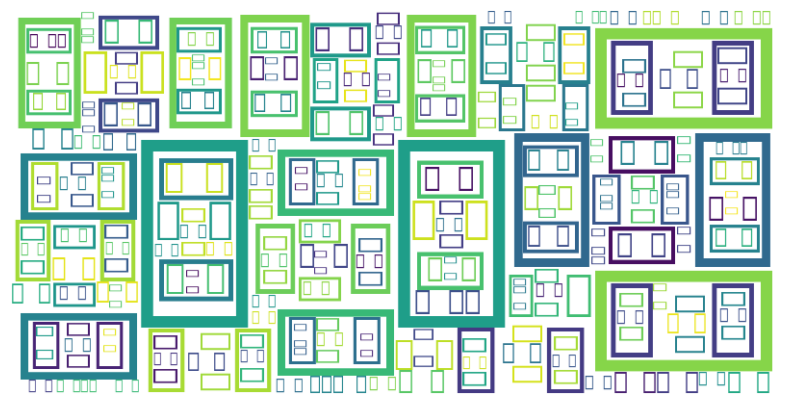

In [44]:
text_combined = ' '.join(df3['text'])

wordcloud = WordCloud(font_path='/kaggle/input/elegant-and-functional-fonts/Hack-Regular.ttf',  
                      width=800,
                      height=400,
                      background_color='white').generate(text_combined)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  
plt.show()

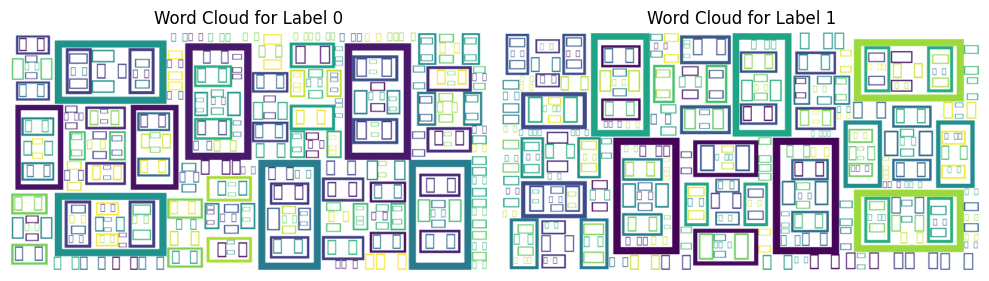

In [45]:
text_label_0 = ' '.join(df3[df3['label'] == 0]['text'])
wordcloud_0 = WordCloud(font_path='/kaggle/input/elegant-and-functional-fonts/Hack-Regular.ttf', 
                        width=800,
                        height=400,
                        background_color='white').generate(text_label_0)

text_label_1 = ' '.join(df3[df3['label'] == 1]['text'])
wordcloud_1 = WordCloud(font_path='/kaggle/input/elegant-and-functional-fonts/Hack-Regular.ttf',  
                        width=800,
                        height=400,
                        background_color='white').generate(text_label_1)


plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1) 
plt.imshow(wordcloud_0, interpolation='bilinear')
plt.axis('off')  
plt.title("Word Cloud for Label 0")  

plt.subplot(1, 2, 2) 
plt.imshow(wordcloud_1, interpolation='bilinear')
plt.axis('off')  
plt.title("Word Cloud for Label 1") 

plt.tight_layout()
plt.show()

# 30 Most common Words From Bangla All Text

In [46]:
all_text = ' '.join(df3['text'])

all_text = re.sub(r'[^\w\s]', ' ', all_text) 
all_text = all_text.lower()  

words = all_text.split()

word_counts = Counter(words)

most_common_words = word_counts.most_common(30)

print("30 Most Common Words:")
for word, count in most_common_words:
    print(f"{word}: {count}")

30 Most Common Words:
র: 1005982
ন: 586314
ব: 408376
ত: 359750
ক: 346982
ল: 329662
স: 321018
ম: 312247
প: 275292
দ: 268745
য়: 236409
য: 228131
ট: 190564
শ: 186869
জ: 160429
ছ: 132338
গ: 128219
হ: 111936
চ: 110519
ষ: 92686
খ: 75278
ধ: 74838
ভ: 74395
থ: 70811
ড: 67019
কর: 48987
ফ: 48871
হয়: 46088
ই: 40872
পর: 39515


In [47]:
def most_common_words(text_data, num_words=30):
    """Returns the most common words from the provided text data."""
    all_text = ' '.join(text_data)

    all_text = re.sub(r'[^\w\s]', ' ', all_text)  
    all_text = all_text.lower()

    words = all_text.split()

    word_counts = Counter(words)

    return word_counts.most_common(num_words)

fake_texts = df3[df3['label'] == 0]['text']
common_fake_words = most_common_words(fake_texts)

real_texts = df3[df3['label'] == 1]['text']
common_real_words = most_common_words(real_texts)

print("Most Common Words from Fake Text:")
for word, count in common_fake_words:
    print(f"{word}: {count}")

print("\nMost Common Words from Real Text:")
for word, count in common_real_words:
    print(f"{word}: {count}")

Most Common Words from Fake Text:
র: 300021
ন: 181074
ব: 123186
ক: 107973
ত: 107668
ল: 99086
স: 97313
ম: 95213
প: 84255
দ: 81115
য: 71429
য়: 70157
ট: 57622
শ: 55154
জ: 48429
ছ: 41325
গ: 38955
হ: 34000
চ: 33176
ষ: 26726
খ: 24552
ভ: 23982
ধ: 22048
থ: 21809
ড: 20850
ফ: 15776
ই: 15062
কর: 14371
হয়: 13263
পর: 11674

Most Common Words from Real Text:
র: 705961
ন: 405240
ব: 285190
ত: 252082
ক: 239009
ল: 230576
স: 223705
ম: 217034
প: 191037
দ: 187630
য়: 166252
য: 156702
ট: 132942
শ: 131715
জ: 112000
ছ: 91013
গ: 89264
হ: 77936
চ: 77343
ষ: 65960
ধ: 52790
খ: 50726
ভ: 50413
থ: 49002
ড: 46169
কর: 34616
ফ: 33095
হয়: 32825
পর: 27841
ই: 25810


# Character Count

In [48]:
def character_count_by_label(df, label):
    """Returns the total and average character count for a specific label."""
    filtered_texts = df3[df3['label'] == label]['text']
    total_characters = sum(filtered_texts.str.len())
    average_characters = total_characters / len(filtered_texts) if len(filtered_texts) > 0 else 0
    return total_characters, average_characters

fake_characters, fake_avg = character_count_by_label(df3, 0)

real_characters, real_avg = character_count_by_label(df3, 1)

print(f"Total Characters in Fake Text: {fake_characters}")
print(f"Average Characters in Fake Text: {fake_avg:.2f}")

print(f"\nTotal Characters in Real Text: {real_characters}")
print(f"Average Characters in Real Text: {real_avg:.2f}")

Total Characters in Fake Text: 6675852
Average Characters in Fake Text: 1471.42

Total Characters in Real Text: 15377739
Average Characters in Real Text: 1537.77


# Word Count

In [49]:
def word_count_by_label(df, label):
    """Returns the total and average word count for a specific label."""
    filtered_texts = df3[df3['label'] == label]['text']
    total_words = sum(filtered_texts.str.split().str.len())
    average_words = total_words / len(filtered_texts) if len(filtered_texts) > 0 else 0
    return total_words, average_words

fake_words, fake_avg = word_count_by_label(df3, 0)


real_words, real_avg = word_count_by_label(df3, 1)


print(f"Total Words in Fake Text: {fake_words}")
print(f"Average Words in Fake Text: {fake_avg:.2f}")

print(f"\nTotal Words in Real Text: {real_words}")
print(f"Average Words in Real Text: {real_avg:.2f}")

Total Words in Fake Text: 953803
Average Words in Fake Text: 210.23

Total Words in Real Text: 2162765
Average Words in Real Text: 216.28


# Sentence Count

In [50]:
avg_len=df3["text"].apply(len)
avg_len=avg_len.mean()
print(f"Average Text Length is : {avg_len:.2f}")

Average Text Length is : 1517.07


In [51]:
df3

,text,label
0,দিনে বিল পাস দশম জাতীয় সংসদের মেয়াদ শেষ হয়ে যা...,0
1,আ’লীগের জনসভায় লোকে লোকারণ্য ফেনী ট্রাংক রোড এ...,0
2,মাদ্রাসায় জোড়া খুন পরিচালক তিন দিনের রিমান্ডে ...,0
3,নেপালকে হারিয়ে গ্রুপ চ্যাম্পিয়ন বাংলাদেশ সাফ অ...,1
4,কুড়িগ্রামে শিক্ষার্থীর লাশ উদ্ধার কুড়িগ্রাম প্...,1
...,...,...
14532,নাইক্ষ্যংছ‌ড়ি‌তে পু‌লি‌শডাকাত বন্দুকযু‌দ্ধে নি...,0
14533,এবি ব্যাংকের প্রাক্তন চেয়ারম্যানসহ জিজ্ঞাসাবাদ...,1
14534,পরীক্ষা বাতিল হওয়ায় ম য় শ্রেণীতে ভর্তি বিশ্ববি...,0
14535,এশিয়া কাপে ভারতপাকিস্তানের মহারণ এশিয়া কাপের স...,0


In [52]:
max_len=800
text_list = df3["text"].str.split().tolist()

### Breakdown of Components

1. **`max_len = 100`**:
   - This line defines a variable `max_len` and assigns it the value of `100`. This variable is likely intended to represent the maximum length of text sequences that will be processed later. In the context of natural language processing (NLP), this is often used to limit the number of words in a sentence or a document to ensure consistency in input sizes when feeding data into models like neural networks. For instance, when padding or truncating sequences, you may want to make sure that all input sequences do not exceed this length.

2. **`text_list = df3["text"].str.split().tolist()`**:
   - This line processes the text data stored in the DataFrame `df3`. Let's break it down further:
   - **`df3["text"]`**: 
     - This accesses the column named "text" in the DataFrame `df3`, which presumably contains textual data.
   - **`.str.split()`**: 
     - This method splits each string in the "text" column into a list of words. By default, it splits based on whitespace (spaces, tabs, etc.). The result is a Series of lists, where each list contains the words from the corresponding text entry.
   - **`.tolist()`**: 
     - This method converts the Series of lists into a list of lists. The final result is `text_list`, which will be a list where each element corresponds to a list of words from the original text entries in `df3`. For example:
     ```python
     text_list = [['this', 'is', 'the', 'first', 'text'],
                  ['here', 'is', 'another', 'text', 'entry']]
     ```

In [53]:
import gensim
word2vec_model = gensim.models.Word2Vec(text_list, vector_size=100, window=5, min_count=1, workers=4, sg=1)

1. **`import gensim`**:
   - This statement imports the `gensim` library, which is a popular Python library for natural language processing (NLP) and topic modeling. Gensim is particularly known for its efficient implementations of word vector models, including Word2Vec.

2. **`gensim.models.Word2Vec`**:
   - This refers to the `Word2Vec` class within the `gensim.models` module. Word2Vec is a technique that creates word embeddings (vector representations of words) based on their context in a corpus of text. It can capture semantic relationships between words by placing similar words closer in the vector space.

3. **Parameters**:
   - **`text_list`**: 
     - This is the input data for training the Word2Vec model. It should be a list of tokenized sentences (lists of words). Each sentence in `text_list` should be a list of words, like:
       ```python
       text_list = [["this", "is", "the", "first", "sentence"], ["this", "is", "the", "second", "sentence"]]
       ```
   - **`vector_size=100`**:
     - This parameter sets the dimensionality of the word vectors. Here, each word will be represented as a vector with 100 dimensions. A higher dimensionality allows for capturing more complex relationships, but it also requires more data and can lead to overfitting if the dataset is small.
   
   - **`window=5`**:
     - This parameter defines the maximum distance between the current and predicted word within a sentence. A window size of 5 means that the model will consider up to 5 words before and after the target word when learning its representation.

   - **`min_count=1`**:
     - This parameter specifies the minimum frequency count of words to be included in the vocabulary. If `min_count` is set to 1, even words that appear only once will be included in the vocabulary. Increasing this value can help filter out less relevant or noisy words from the model.

   - **`workers=4`**:
     - This parameter defines the number of worker threads to train the model. Setting `workers=4` means that the training process will utilize 4 threads, allowing for faster computation on multi-core processors.

   - **`sg=1`**:
     - This parameter determines the training algorithm to be used. If `sg=1`, the model will use the Skip-Gram model, which predicts the context words based on a target word. If `sg=0`, the model will use the Continuous Bag of Words (CBOW) approach, which predicts a target word based on its surrounding context words.

In [54]:
len(word2vec_model.wv.index_to_key)

182131

1. **`word2vec_model`**:
   - This variable refers to the Word2Vec model that you created using the `gensim` library. It contains information about the word embeddings that were learned from the training data.

2. **`wv`**:
   - The `wv` attribute of the Word2Vec model provides access to the word vectors and associated methods for working with the model's vocabulary.

3. **`index_to_key`**:
   - The `index_to_key` attribute is a list that contains the words in the vocabulary of the Word2Vec model. The words are stored in the order of their indices. Essentially, it maps the index of a word in the vector space to the actual word itself. 
   - This attribute was introduced in later versions of `gensim` (after version 4.0.0). In earlier versions, it was known as `vocab`.

4. **`len()`**:
   - The `len()` function is used to calculate the length of the list returned by `index_to_key`. This will give you the total count of unique words in the vocabulary of the trained Word2Vec model.

### Purpose
When you run `len(word2vec_model.wv.index_to_key)`, it will return an integer that represents the size of the vocabulary used in the Word2Vec model, i.e., the total number of unique words for which embeddings have been learned based on the provided training data. 

### Example
If the output is, for example, `1500`, it means that the model has learned embeddings for 1500 unique words from the training data. This information is useful for understanding the model's coverage and the richness of the vocabulary it has learned from the input text.

In [55]:
word2vec_model.wv["রাজনীতি"] 

array([-1.6416754e-01,  5.5779052e-01, -1.9027708e-01,  1.9701503e-01,
       -7.3470823e-02, -3.5583338e-01, -2.2894233e-01,  1.1959788e-01,
       -3.7396571e-01,  1.1554860e-01,  1.4015803e-01,  7.6806217e-02,
       -8.8610941e-01,  2.5511461e-01,  1.3885957e-01, -1.7171256e-01,
       -2.5376472e-01, -4.4564465e-01, -7.7330720e-01, -8.0681288e-01,
       -1.7282934e-01,  1.5646930e-01,  4.9071443e-01, -7.4600846e-02,
        1.3038652e-01,  4.6681935e-01, -2.9229107e-01,  1.5709271e-01,
       -4.8455840e-01, -1.7474292e-01,  2.7761090e-01, -9.3902424e-02,
       -5.6505358e-01, -4.8820794e-01,  4.7610190e-02, -1.3532701e-01,
        3.1285271e-01,  9.4425894e-02, -6.3031986e-02, -9.1282320e-01,
        8.4363058e-02, -2.2444510e-01, -4.5975316e-01,  2.8146732e-01,
       -3.9533755e-01, -3.3993167e-01, -4.9891028e-01,  4.7703096e-01,
        2.1814939e-01, -2.0178531e-03, -4.9360761e-01, -4.4562089e-01,
       -6.6768324e-01,  2.6316723e-01, -2.7411774e-01, -1.7684178e-01,
      

In [56]:
word2vec_model.wv["জরিমানা"] 

array([ 1.5132521e-01,  5.9608507e-01, -4.4528678e-01, -3.4007676e-02,
        2.2188969e-01, -4.7294271e-01,  9.7196621e-01,  1.0826944e+00,
        4.2207703e-02,  2.0911317e-01, -1.9220053e-01, -8.1729466e-01,
       -4.9189925e-01,  3.3858338e-01, -5.0175387e-01,  2.5136271e-01,
        7.5654930e-01, -3.8091877e-01, -3.6973777e-01, -1.0596191e+00,
        3.1054062e-01, -2.8273201e-01,  7.1292348e-02, -9.0463134e-03,
        1.2803113e-01, -4.3810222e-01,  8.2909131e-01, -4.4656050e-01,
        2.7027428e-01,  3.0944064e-01, -6.1890419e-04,  1.0512769e-01,
       -3.9488581e-01, -1.8722251e-01,  9.0633988e-02,  6.1615515e-01,
        4.9757376e-01, -8.0366021e-01, -3.9258771e-02,  1.3318706e-01,
        2.4182206e-01,  7.6960310e-02,  1.9147357e-01,  6.2307566e-02,
        5.8288848e-01,  2.1031387e-01, -3.2103923e-01,  4.7493866e-01,
        2.1479461e-02,  1.1149286e-01,  8.1615821e-02, -2.6065174e-01,
       -2.5508374e-01,  1.2917799e-02, -3.0303156e-01,  1.6113353e-01,
      

In [57]:
word2vec_model.wv.most_similar('কলকাতা', topn=10)

[('মুম্বাই', 0.7740600109100342),
 ('দিল্লি', 0.7296543717384338),
 ('ফ্লাইট।', 0.7033280730247498),
 ('কক্সবাজারগামী', 0.7002522349357605),
 ('বোয়িং', 0.694570004940033),
 ('মদ্যপ', 0.6910601258277893),
 ('এসেছিলেন', 0.6903970241546631),
 ('ফাইটে', 0.6896572113037109),
 ('পৌঁছাবেন', 0.6867520213127136),
 ('এসভি', 0.6857340931892395)]

In [58]:
word2vec_model.wv.most_similar("মৌসুমী", topn=10)

[('মৌসুমি', 0.711206316947937),
 ('বর্ধিতাংশ', 0.673800528049469),
 ('অক্ষের', 0.6720437407493591),
 ('তমা', 0.6539283990859985),
 ('মিসরাত', 0.634303629398346),
 ('নেহওয়ালের', 0.6315779089927673),
 ('অক্ষ', 0.6280439496040344),
 ('রত্ন', 0.624890148639679),
 ('রোয়ান', 0.6239943504333496),
 ('অ্যাটাক’', 0.623502790927887)]

In [59]:
tokenizer=Tokenizer()
tokenizer.fit_on_texts(text_list)
text_seq=tokenizer.texts_to_sequences(text_list)
pad_seq=pad_sequences(text_seq,maxlen=max_len)
vocab_size=len(word2vec_model.wv.key_to_index)

1. **`tokenizer = Tokenizer()`**:
   - This line initializes a `Tokenizer` instance. The `Tokenizer` class is used to convert text into sequences of integers, where each unique word is assigned a unique integer index. It is commonly used in text preprocessing for deep learning models.

2. **`tokenizer.fit_on_texts(text_list)`**:
   - This method trains the `Tokenizer` on the `text_list`, which contains the tokenized sentences (lists of words). During this process, the tokenizer builds a vocabulary and assigns an index to each unique word found in `text_list`. The word that appears most frequently will have the index 1, the second most frequent word will have index 2, and so on. This mapping can be accessed later for encoding and decoding text.

3. **`text_seq = tokenizer.texts_to_sequences(text_list)`**:
   - After fitting the tokenizer, this method converts the tokenized texts into sequences of integers based on the vocabulary created in the previous step. Each word in the original texts is replaced by its corresponding integer index. If a word is not found in the vocabulary, it is ignored. The result, `text_seq`, is a list of lists, where each inner list contains integer representations of the words in the corresponding text entry.

4. **`pad_seq = pad_sequences(text_seq, maxlen=max_len)`**:
   - The `pad_sequences` function is used to ensure that all sequences have the same length, which is necessary when inputting data into deep learning models. It will either pad shorter sequences with zeros at the beginning or end (depending on the padding strategy) or truncate longer sequences to the `max_len` specified (in this case, `800`). The result, `pad_seq`, is a 2D array where each row corresponds to a padded or truncated sequence.

5. **`vocab_size = len(word2vec_model.wv.key_to_index)`**:
   - This line calculates the size of the vocabulary from the trained Word2Vec model by checking the length of the `key_to_index` dictionary, which maps words to their corresponding indices in the Word2Vec model. This gives you the total number of unique words for which word embeddings have been learned.

### Summary
- The entire process involves tokenizing the text data, converting the tokenized texts into sequences of integers, and ensuring that all sequences have a consistent length through padding.
- The `vocab_size` variable tells you how many unique words have been learned in the Word2Vec model, which can be useful for further model training, evaluation, and understanding the coverage of your vocabulary.

In [60]:
my_label=df3["label"].values

In [61]:
X_train,X_test,Y_train,Y_test = train_test_split(pad_seq,my_label,test_size=0.2,stratify = my_label, random_state=42)

In [62]:
from sklearn.utils import resample

train_data = pd.DataFrame(X_train)
train_data['label'] = Y_train

In [63]:
train_data['label'].unique()

array([1, 0])

In [64]:
majority = train_data[train_data['label'] == 0]  
minority = train_data[train_data['label'] == 1] 

minority_upsampled = resample(minority,
                               replace=True,     
                               n_samples=len(majority),    
                               random_state=42) 

balanced_train_data = pd.concat([majority, minority_upsampled])

X_train_balanced = balanced_train_data.drop('label', axis=1).values
y_train_balanced = balanced_train_data['label'].values

In [65]:
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dropout, Dense 
from keras.optimizers import Adam

learning_rate = 0.0001
embedding_dim=100

model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim,input_shape=(max_len,)))
model.add(LSTM(units=64, activation="tanh"))
model.add(Dropout(0.3))
model.add(Dense(units=1, activation='sigmoid'))
optimizer = Adam(learning_rate=learning_rate)

model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 800, 100)       │    18,213,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 64)             │        42,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 18,255,405 (69.64 MB)

 Trainable params: 18,255,405 (69.64 MB)

 Non-trainable params: 0 (0.00 B)

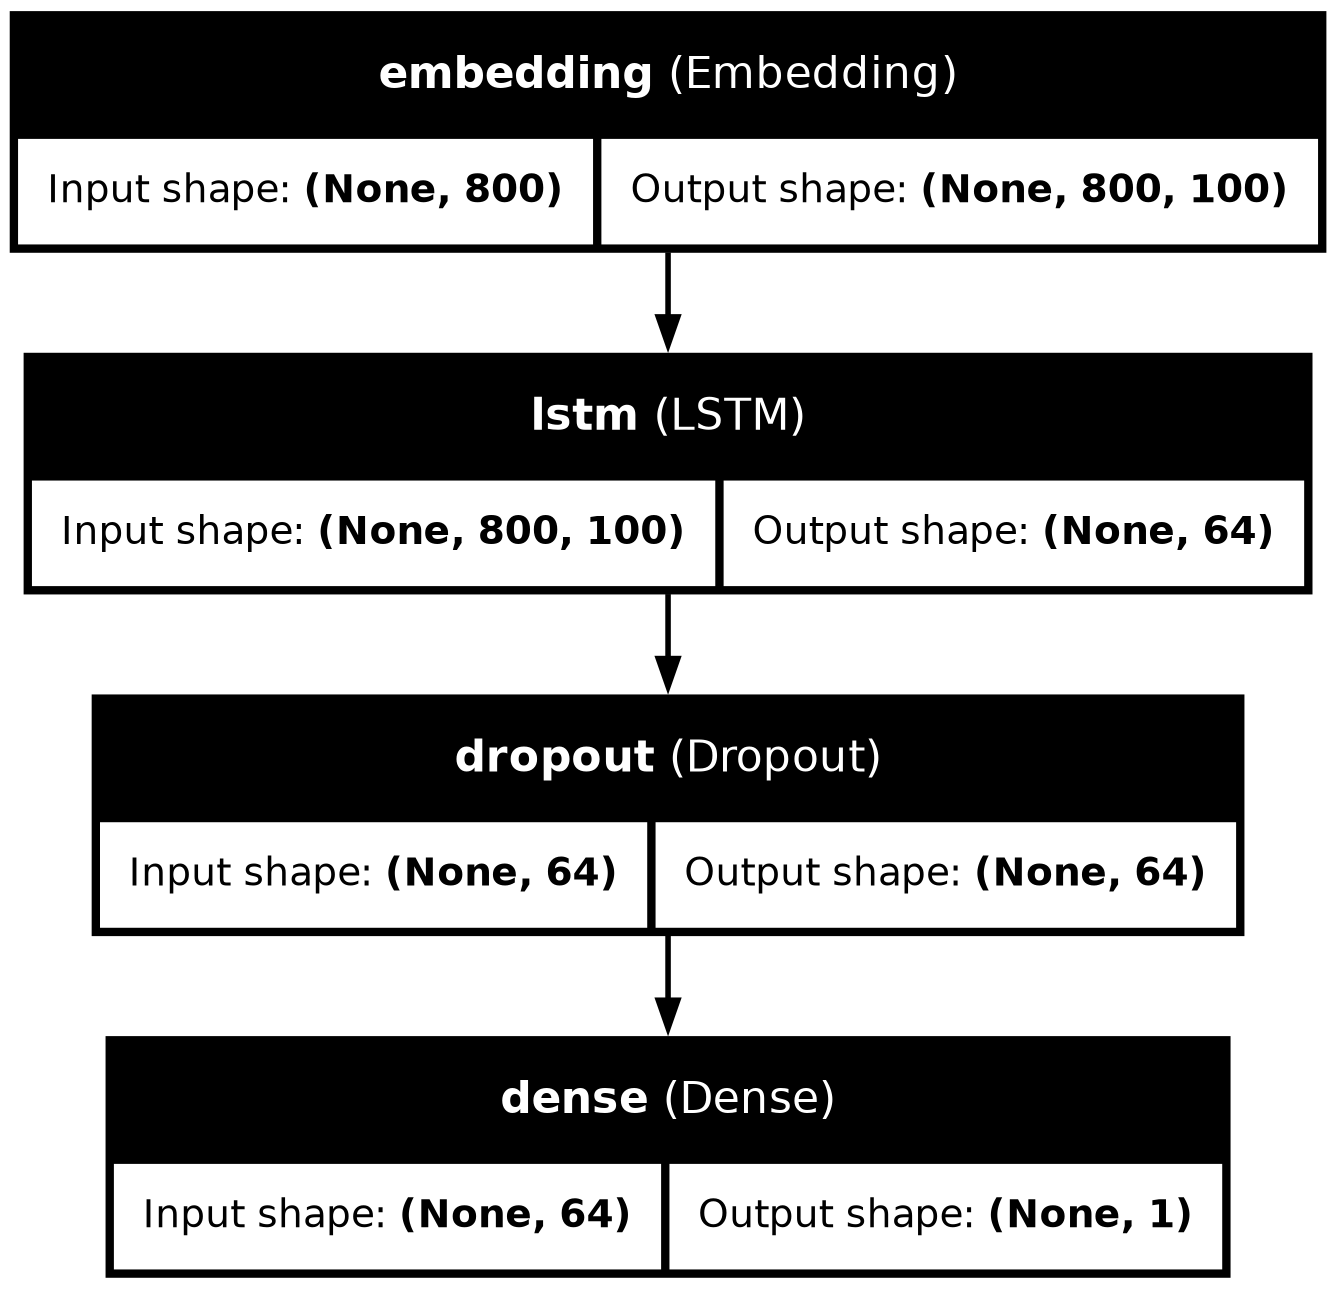

In [66]:
from keras.utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [67]:
history=model.fit(X_train_balanced,y_train_balanced,validation_data=(X_test,Y_test),epochs=10,batch_size=64)

Epoch 1/10
114/114 ━━━━━━━━━━━━━━━━━━━━ 107s 914ms/step - accuracy: 0.5114 - loss: 0.6928 - val_accuracy: 0.5657 - val_loss: 0.6911
Epoch 2/10
114/114 ━━━━━━━━━━━━━━━━━━━━ 104s 909ms/step - accuracy: 0.6805 - loss: 0.6861 - val_accuracy: 0.6657 - val_loss: 0.6391
Epoch 3/10
114/114 ━━━━━━━━━━━━━━━━━━━━ 143s 919ms/step - accuracy: 0.7092 - loss: 0.5949 - val_accuracy: 0.6733 - val_loss: 0.6177
Epoch 4/10
114/114 ━━━━━━━━━━━━━━━━━━━━ 104s 915ms/step - accuracy: 0.8482 - loss: 0.4018 - val_accuracy: 0.6348 - val_loss: 0.7128
Epoch 5/10
114/114 ━━━━━━━━━━━━━━━━━━━━ 141s 911ms/step - accuracy: 0.9394 - loss: 0.2016 - val_accuracy: 0.6376 - val_loss: 0.8430
Epoch 6/10
114/114 ━━━━━━━━━━━━━━━━━━━━ 104s 910ms/step - accuracy: 0.9625 - loss: 0.1309 - val_accuracy: 0.6589 - val_loss: 0.8580
Epoch 7/10
114/114 ━━━━━━━━━━━━━━━━━━━━ 103s 909ms/step - accuracy: 0.9678 - loss: 0.1158 - val_accuracy: 0.6362 - val_loss: 0.9409
Epoch 8/10
114/114 ━━━━━━━━━━━━━━━━━━━━ 103s 906ms/step - accuracy: 0.9724 -

In [68]:
model.save("bangla_english_fake_model.h5")

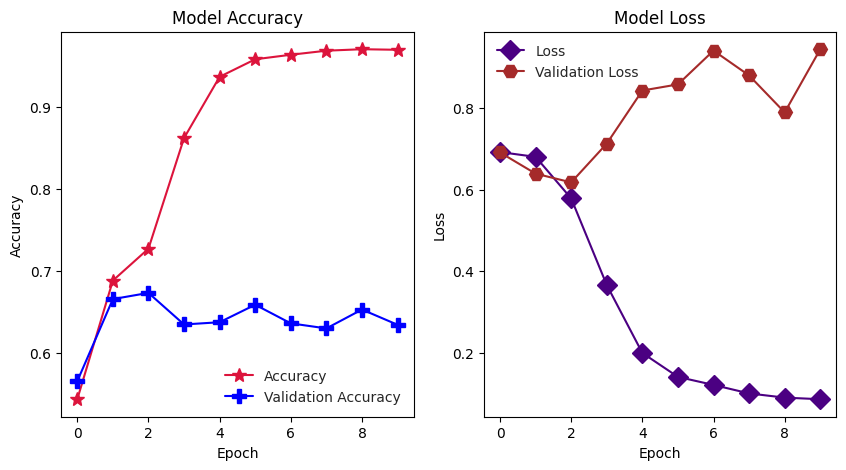

In [69]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
plt.style.use("seaborn-v0_8-dark")

ax[0].plot(history.history['accuracy'],label="Accuracy",color="crimson",marker="*",markersize=10)
ax[0].plot(history.history['val_accuracy'],label="Validation Accuracy",color="blue",marker="P",markersize=10)
ax[0].set_title('Model Accuracy')
ax[0].set_ylabel('Accuracy')
ax[0].set_xlabel('Epoch')
ax[0].legend(loc='best')

ax[1].plot(history.history['loss'],label="Loss",color="indigo",marker="D",markersize=10)
ax[1].plot(history.history['val_loss'],label="Validation Loss",color="brown",marker="H",markersize=10)
ax[1].set_title('Model Loss')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epoch')
ax[1].legend(loc='best')

plt.show()


# Model Predict

In [70]:
pred=model.predict(X_test)
final_predict=(pred>=0.5).astype("int32")

91/91 ━━━━━━━━━━━━━━━━━━━━ 13s 142ms/step


# receiver operating characteristic curve

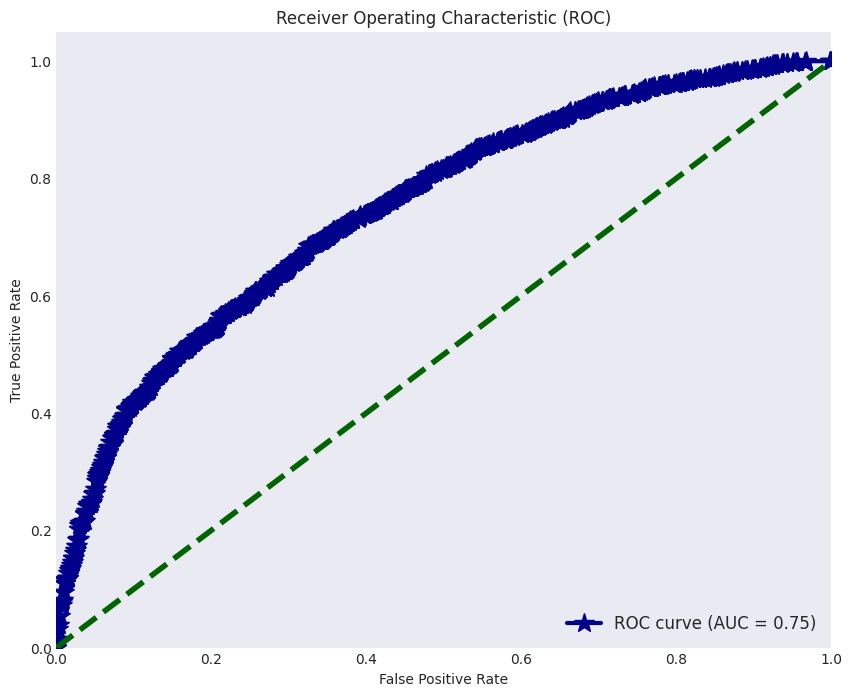

In [71]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(Y_test,pred)

roc_auc = auc(fpr, tpr)
plt.figure(figsize=(10, 8))
plt.style.use("seaborn-v0_8-dark")
plt.plot(fpr, tpr, color='darkblue', lw=3, label='ROC curve (AUC = %0.2f)' % roc_auc,marker="*",markersize=15)
plt.plot([0, 1], [0, 1], color='darkgreen', lw=4, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right",fontsize=12,edgecolor="black")
plt.show()

# Precision Recall Curve

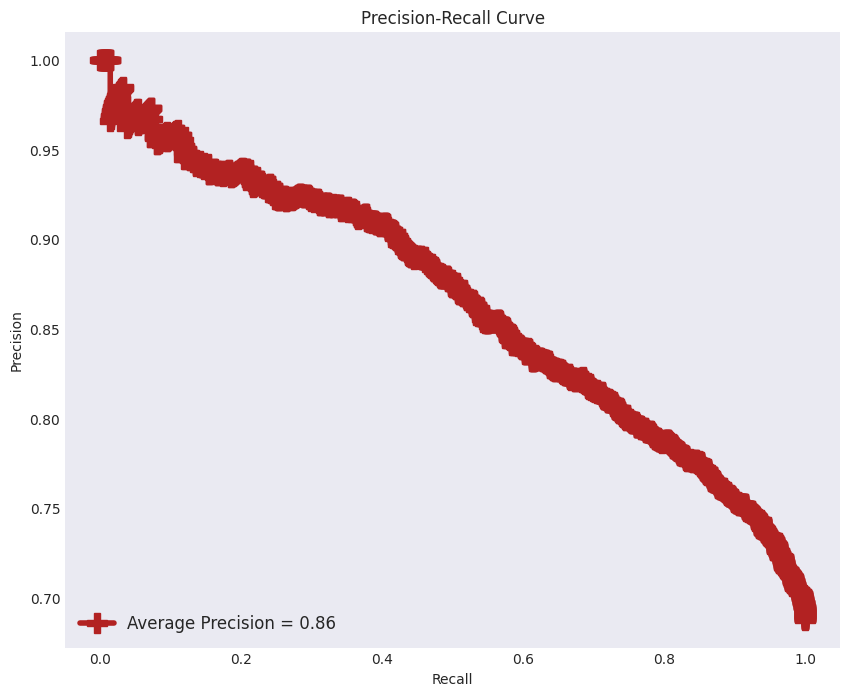

In [72]:
from sklearn.metrics import precision_recall_curve, average_precision_score

precision, recall, thresholds = precision_recall_curve(Y_test,pred)

ap_score = average_precision_score(Y_test,pred)
plt.figure(figsize=(10,8))
plt.style.use("seaborn-v0_8-dark")
plt.plot(recall, precision, color='firebrick', lw=4, label='Average Precision = %0.2f' % ap_score,marker="P",markersize=15)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left",fontsize=12,edgecolor="black")
plt.show()

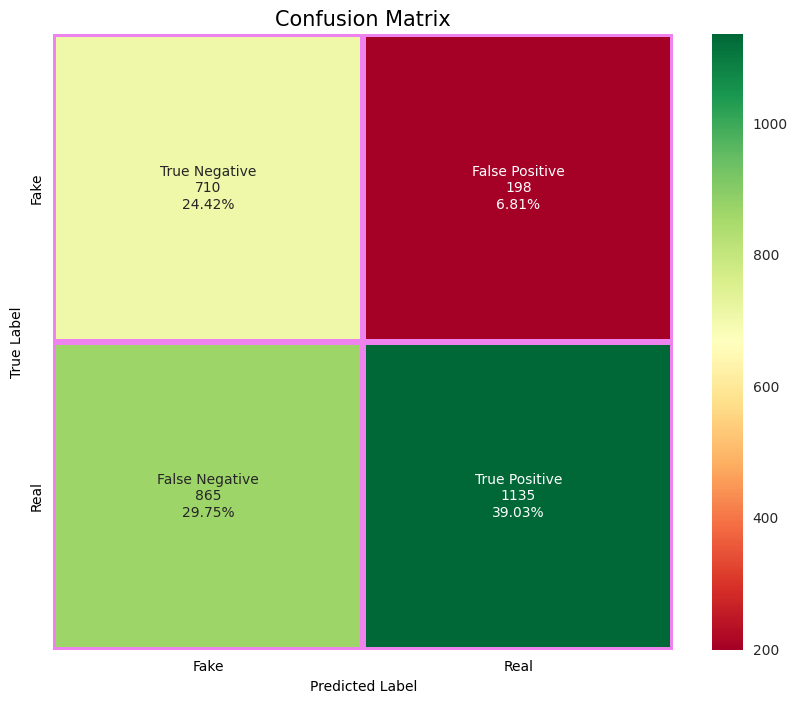

In [73]:
from sklearn.metrics import log_loss, cohen_kappa_score, matthews_corrcoef, brier_score_loss
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score,precision_score

label_name=["Fake","Real"]
my_matrix= confusion_matrix(Y_test, final_predict)
my_label = ["True Negative","False Positive","False Negative","True Positive"]
my_label_count=["{0:0.0f}".format(value) for value in my_matrix.flatten()]
percentage=["{0:.2%}".format(value) for value in my_matrix.flatten()/np.sum(my_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(my_label,my_label_count,percentage)]
labels=np.asarray(labels).reshape(2, 2)

plt.figure(figsize=(10,8))
plt.style.use("seaborn-v0_8-notebook")
sns.heatmap(my_matrix, annot=labels, cmap="RdYlGn", fmt="", cbar=True,
            xticklabels=label_name,yticklabels=label_name,lw=4,linecolor="violet")
plt.xlabel("Predicted Label",fontsize=10,color="black")
plt.ylabel("True Label",fontsize=10,color="black")
plt.title("Confusion Matrix",fontsize=15,color="black")
plt.xticks(fontsize=10,color="black")
plt.yticks(fontsize=10,color="black")
plt.show()

In [74]:
print(classification_report(Y_test,final_predict,target_names=label_name))

              precision    recall  f1-score   support

        Fake       0.45      0.78      0.57       908
        Real       0.85      0.57      0.68      2000

    accuracy                           0.63      2908
   macro avg       0.65      0.67      0.63      2908
weighted avg       0.73      0.63      0.65      2908



# Custom Data Prediction

In [75]:
text = "রাজশাহীর পুঠিয়া উপজেলার একটি গ্রামে গতকাল সোমবার বৃষ্টির জন্য ব্যাঙের বিয়ে দেওয়া হয়েছে। দুপুর সাড়ে ১২টা থেকে বেলা সাড়ে ৩টা পর্যন্ত গ্রামের ৬০ থেকে ৭০টি বাড়িতে বৃষ্টির জন্য গান গাওয়া শেষে বিয়ের অনুষ্ঠান হয়। বিয়ে শেষে সন্ধ্যায় ছিল খাওয়াদাওয়ার আয়োজন।উপজেলার তাতারপুর গ্রামের ইউসুফ আলী ও হাবিবা খাতুন নামের দুই শিক্ষার্থীর উদ্যোগে এই বিয়ের অনুষ্ঠানের আয়োজন করা হয়।"
my_text_seq = tokenizer.texts_to_sequences([text])
my_text = pad_sequences(my_text_seq, maxlen=max_len)
my_pred = model.predict(my_text)

myfinal_pred = (my_pred >= 0.5).astype("int32")
if myfinal_pred == 0:
    print("News is Fake")
else:
    print("News is Real")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
News is Real


In [76]:
text = "৮ দিনে ১৮ বিল পাসদশম জাতীয় সংসদের মেয়াদ শেষ হয়ে যাচ্ছে। কার্যত অধিবেশনই রয়েছে বর্তমান সরকারের। অক্টোবরের মাঝামাঝিতে সংক্ষিপ্ত অধিবেশন ডেকেই \u200dইিত টানা সংসেদর। এরপর ডিসেম্বরের শেষ সপ্তাহে একাদশ সংসদ নির্বাচনের সংখ্যাগরিষ্ঠতা পাবেন তারাই সরকার গঠন করবেন। জানুয়ারিতে বসতে সরকারের অধিবেশন। বর্তমান সরকারের পাঁচ বছর পূর্ণ বছরের ২৮ জানুয়ারি। সংবিধান অনুযায়ী বিদ্যমান সংসদ ভেঙে দেওয়ার আগের ৯০ দিনের পরবর্তী সংসদ নির্বাচন কথা রয়েছে। হিসেবে অক্টোবর নির্বাচনের কাউনডাউন হবে। সরকারের মহলের আলোচনার পরিপ্রেক্ষিতে ধারণা হচ্ছে ২৮ অক্টোবরের মধ্য নির্বাচনকালীন সরকার গঠন হবে। সরকার রুটিন ওয়ার্ক করবে। দেশে উদ্বুদ্ধ পরিস্থিতির সৃষ্টি রাষ্ট্রপতি চাইলে যেকোনো সময় অধিবেশন আহ্বান পারেন। এদিকে দশম জাতীয় সংসদের ২২তম অধিবেশনটি রেকর্ডের খাতায় লেখা থাকবে। কেননা অধিবেশনের আট কার্যদিবসের ইতোমধ্যেই ১৪টি বিল পাস হয়ে শেষ দিনে চারটি পাস যাচ্ছে। হিসেবে অনন্য উচ্চতায় অধিবেশন। এতো অল্প সময়ে সংখ্যক বিল পাসের নজির নেই। গত ৯ সেপ্টেম্বর ২২তম অধিবেশন। ২০ সেপ্টেম্বর শেষ যাচ্ছে। শুক্রশনিবার বাদ দিয়ে টানা ১০ কার্যদিবস অধিবেশন চলে। বর্তমান সংসদের দু’জন সদস্যের মৃত্যুতে শোক প্রস্তাব গৃহীত হওয়ায় অন্যান্য সকল কার্যসূচি স্থগিত থাকে। তাছাড়া ১১ সেপ্টেম্বর বিদ্যুৎ বিপর্যয়ের কারণে এক ঘণ্টা অধিবেশন চালানোর স্থগিত হয়ে যায়। কারণে ১০ চললেও মূলত ৮ কার্যদিবসে কার্যক্রম পরিচালিত হয়। সংসদ সচিবালয়ের এক কর্মকর্তা বাংলানিউজকে বলেন এতো অল্প সময়ে এতোগুলো বিল পাস হয়েছে নেই। শেষ দিনেও চারটি বিল পাস হবে। সরকারের বিদায়ী বছরের অধিবেশনে কয়েকটি গুরুত্বপূর্ণ বিল পাস হয়। সাংবাদিকদের দাবি উপেক্ষা পাস ডিজিটাল নিরাপত্তা আইন। এছাড়া পাস সড়ক পরিবহন \u200cআইন। বাইরে কওমি মাদ্রাসাগুলোর দাবির পরিপ্রেক্ষিতে ‘কওমি মাদ্রাসাগুলোর দাওরায়ে হাদিসের সনদকে মাস্টার্স ডিগ্রি ইসলামিক স্টাডিজ আরবি সমমান আইন। তিনটি আইনের বিলই বুধবার ১৯ সেপ্টেম্বর পাস হয়েছে। বৃহস্পতিবার ২০ সেপ্টেম্বর সংসদ সচিবালয়ের কার্যসূচিতে চারটি বিল পাসের তালিকায় হয়েছে। রয়েছে জাতীয় ক্রীড়া পরিষদ বিল পণ্য উৎপাদনশীল রাষ্ট্রায়ত্ত শিল্প প্রতিষ্ঠান শ্রমিক চাকরি শর্তাবলী বিল বাংলাদেশ মুক্তিযোদ্ধা কল্যাণ ট্রাস্ট বিল কমিউনিটি ক্লিনিক স্বাস্থ্য সহায়তা বিল। এছাড়া ১৮ সেপ্টেম্বর পাস তিনটি বিল। সেগুলো হলো বাংলাদেশ কর্মচারী কল্যাণ বোর্ড সংশোধন বিল কৃষি বিপণন বিল জাতীয় দক্ষতা উন্নয়ন কর্তৃপক্ষ বিল। বাজেট অধিবেশনে ২৫ কার্যদিবসে বাজেট \u200dপাস ছাড়াও ১৪টি বিল পাস হয়। এবারের অধিবেশনে প্রধানমন্ত্রীর দু’টি কার্যদিবসে প্রশ্নোত্তর পর্ব ছিল। কার্যদিবসে প্রধানমন্ত্রীর দেওয়ার ৮৪টি প্রশ্ন পাওয়া যায়। প্রধানমন্ত্রী ২৬টি প্রশ্নের দেন। অন্যান্য মন্ত্রীদের এক ৫০৪টি প্রশ্ন পাওয়া যায়। মন্ত্রীরা ৮০৪টি প্রশ্নের দিয়েছেন। বাংলাদেশ সময় ১৫০০ ঘণ্টা সেপ্টেম্বর ২০ ২০১৮ এসএমটিএ"
my_text_seq = tokenizer.texts_to_sequences([text])
my_text = pad_sequences(my_text_seq, maxlen=max_len)
my_pred = model.predict(my_text)

myfinal_pred = (my_pred >= 0.5).astype("int32")
if myfinal_pred == 0:
    print("News is Fake")
else:
    print("News is Real")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
News is Fake


In [77]:
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dropout, Dense, Bidirectional
from keras.optimizers import Adam

learning_rate = 0.0001
embedding_dim = 100

model = Sequential()

model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_len))

model.add(Bidirectional(LSTM(units=64, activation='tanh')))

model.add(Dropout(0.3))

model.add(Dense(units=1, activation='sigmoid'))

optimizer = Adam(learning_rate=learning_rate)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

In [78]:
history=model.fit(X_train_balanced,y_train_balanced,validation_data=(X_test,Y_test),epochs=10,batch_size=64)

Epoch 1/10
114/114 ━━━━━━━━━━━━━━━━━━━━ 151s 1s/step - accuracy: 0.5044 - loss: 0.6932 - val_accuracy: 0.6496 - val_loss: 0.6902
Epoch 2/10
114/114 ━━━━━━━━━━━━━━━━━━━━ 145s 1s/step - accuracy: 0.5547 - loss: 0.6888 - val_accuracy: 0.5450 - val_loss: 0.6853
Epoch 3/10
114/114 ━━━━━━━━━━━━━━━━━━━━ 203s 1s/step - accuracy: 0.6777 - loss: 0.6329 - val_accuracy: 0.6011 - val_loss: 0.6644
Epoch 4/10
114/114 ━━━━━━━━━━━━━━━━━━━━ 145s 1s/step - accuracy: 0.8340 - loss: 0.4549 - val_accuracy: 0.6857 - val_loss: 0.5964
Epoch 5/10
114/114 ━━━━━━━━━━━━━━━━━━━━ 202s 1s/step - accuracy: 0.9242 - loss: 0.2578 - val_accuracy: 0.6743 - val_loss: 0.7265
Epoch 6/10
114/114 ━━━━━━━━━━━━━━━━━━━━ 146s 1s/step - accuracy: 0.9541 - loss: 0.1714 - val_accuracy: 0.6568 - val_loss: 0.7703
Epoch 7/10
114/114 ━━━━━━━━━━━━━━━━━━━━ 146s 1s/step - accuracy: 0.9643 - loss: 0.1343 - val_accuracy: 0.6802 - val_loss: 0.6947
Epoch 8/10
114/114 ━━━━━━━━━━━━━━━━━━━━ 146s 1s/step - accuracy: 0.9682 - loss: 0.1161 - val_accu

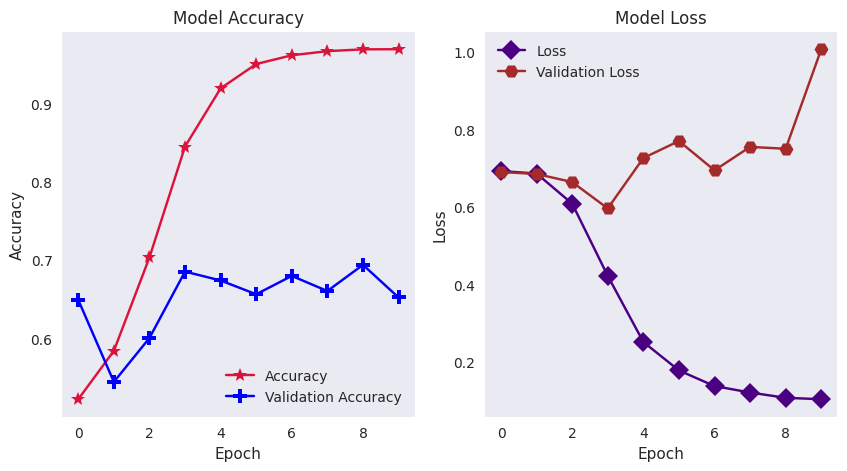

In [79]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
plt.style.use("seaborn-v0_8-dark")

ax[0].plot(history.history['accuracy'],label="Accuracy",color="crimson",marker="*",markersize=10)
ax[0].plot(history.history['val_accuracy'],label="Validation Accuracy",color="blue",marker="P",markersize=10)
ax[0].set_title('Model Accuracy')
ax[0].set_ylabel('Accuracy')
ax[0].set_xlabel('Epoch')
ax[0].legend(loc='best')

ax[1].plot(history.history['loss'],label="Loss",color="indigo",marker="D",markersize=10)
ax[1].plot(history.history['val_loss'],label="Validation Loss",color="brown",marker="H",markersize=10)
ax[1].set_title('Model Loss')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epoch')
ax[1].legend(loc='best')

plt.show()

In [80]:
pred=model.predict(X_test)
final_predict=(pred>=0.5).astype("int32")

91/91 ━━━━━━━━━━━━━━━━━━━━ 14s 154ms/step


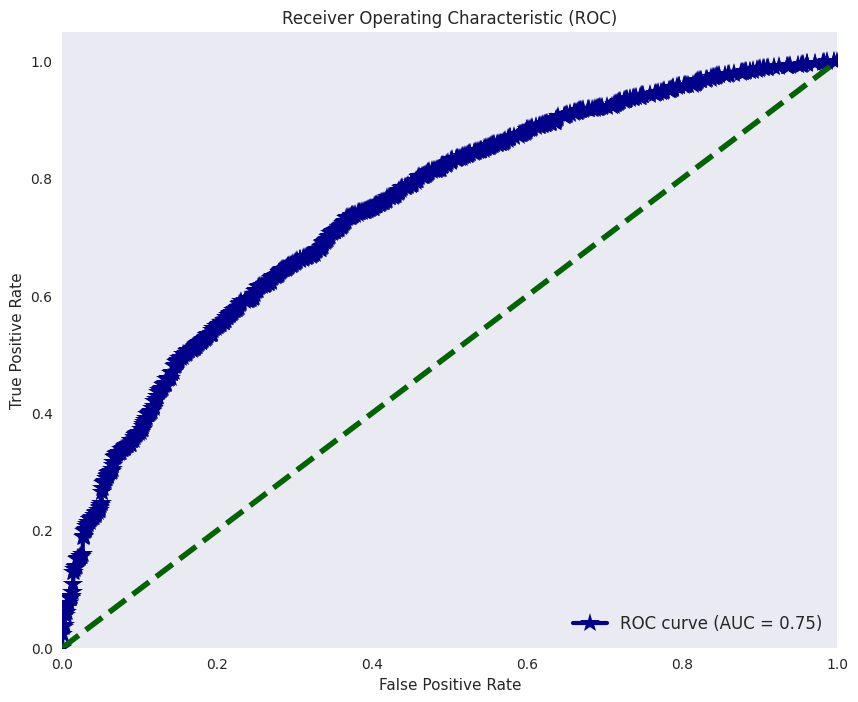

In [81]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(Y_test,pred)

roc_auc = auc(fpr, tpr)
plt.figure(figsize=(10, 8))
plt.style.use("seaborn-v0_8-dark")
plt.plot(fpr, tpr, color='darkblue', lw=3, label='ROC curve (AUC = %0.2f)' % roc_auc,marker="*",markersize=15)
plt.plot([0, 1], [0, 1], color='darkgreen', lw=4, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right",fontsize=12,edgecolor="black")
plt.show()

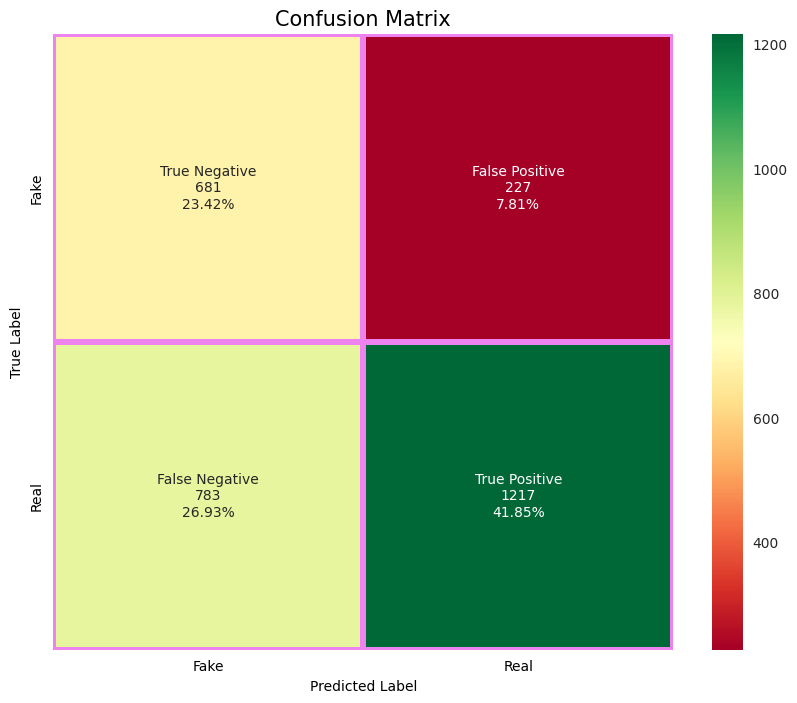

In [82]:
from sklearn.metrics import log_loss, cohen_kappa_score, matthews_corrcoef, brier_score_loss
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score,precision_score

label_name=["Fake","Real"]
my_matrix= confusion_matrix(Y_test, final_predict)
my_label = ["True Negative","False Positive","False Negative","True Positive"]
my_label_count=["{0:0.0f}".format(value) for value in my_matrix.flatten()]
percentage=["{0:.2%}".format(value) for value in my_matrix.flatten()/np.sum(my_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(my_label,my_label_count,percentage)]
labels=np.asarray(labels).reshape(2, 2)

plt.figure(figsize=(10,8))
plt.style.use("seaborn-v0_8-notebook")
sns.heatmap(my_matrix, annot=labels, cmap="RdYlGn", fmt="", cbar=True,
            xticklabels=label_name,yticklabels=label_name,lw=4,linecolor="violet")
plt.xlabel("Predicted Label",fontsize=10,color="black")
plt.ylabel("True Label",fontsize=10,color="black")
plt.title("Confusion Matrix",fontsize=15,color="black")
plt.xticks(fontsize=10,color="black")
plt.yticks(fontsize=10,color="black")
plt.show()

In [83]:
print(classification_report(Y_test,final_predict,target_names=label_name))

              precision    recall  f1-score   support

        Fake       0.47      0.75      0.57       908
        Real       0.84      0.61      0.71      2000

    accuracy                           0.65      2908
   macro avg       0.65      0.68      0.64      2908
weighted avg       0.72      0.65      0.67      2908

